In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv("D:/soni_ed/spyder/files/assignment/ToyotaCorolla - MLR.csv")
df
df.head()
df.tail()
df.info()
df.describe()
#checking the dataset contains any null values
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

The 'Fuel_Type' column contains the object data type.


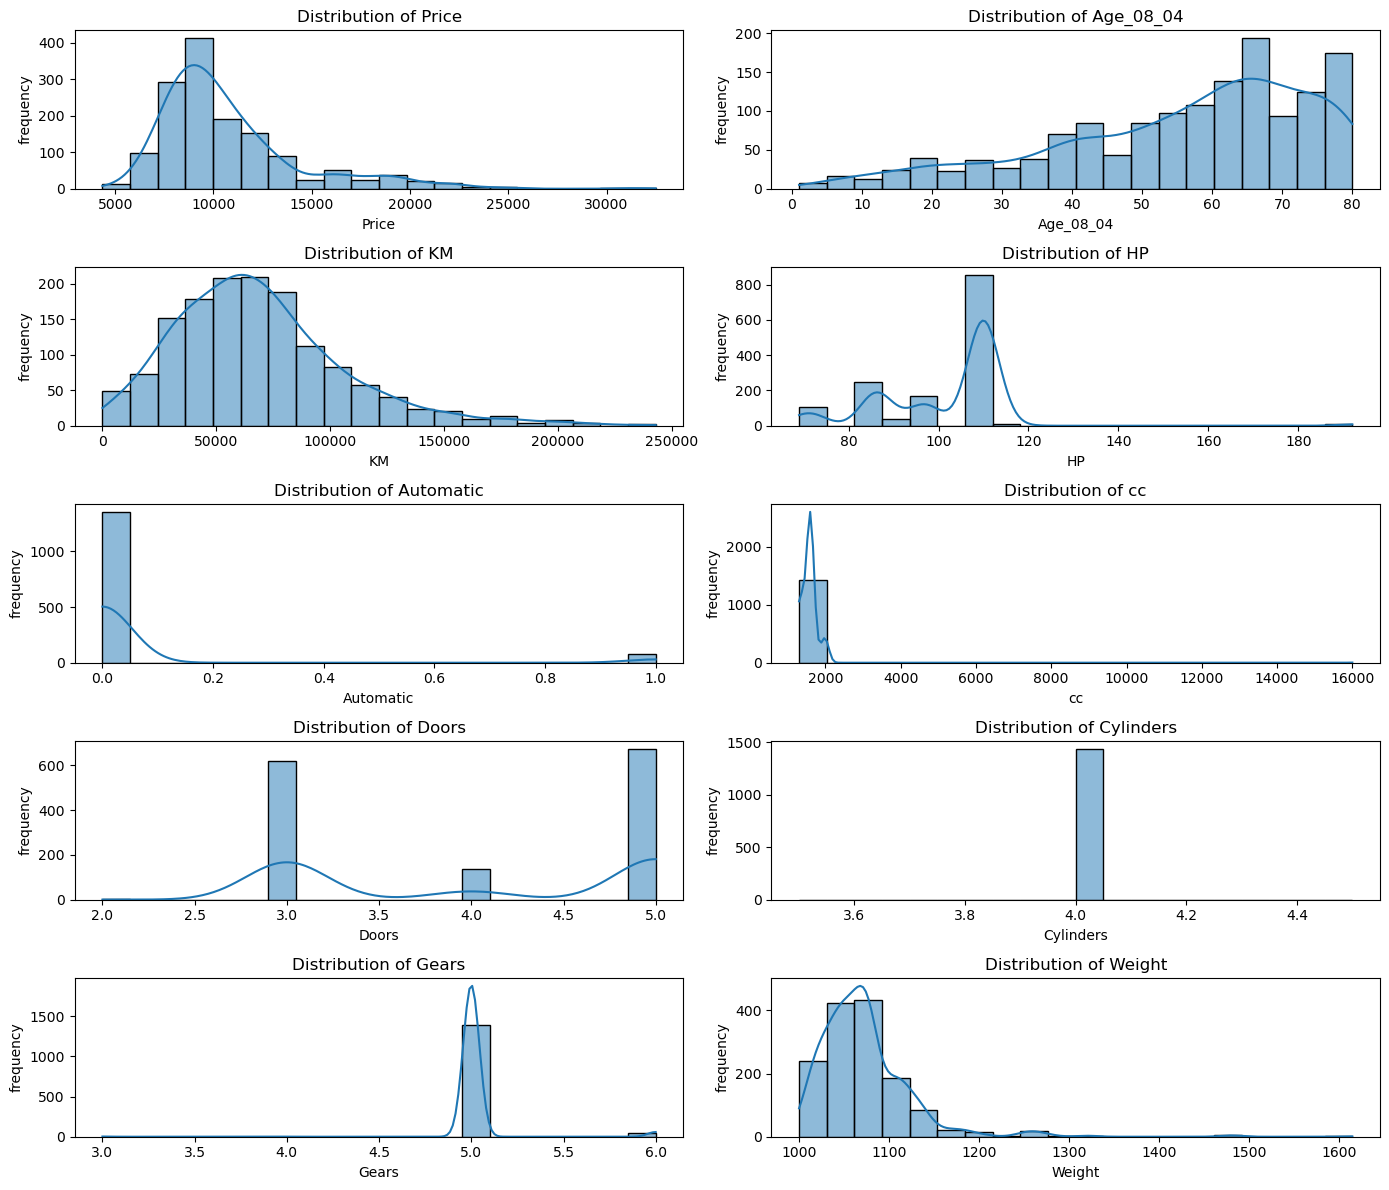

In [3]:
#HISTOGRAM
def hist(data):
    n_num = data.select_dtypes(exclude='object').columns
    l_num=len(n_num)
    sub_index=1
    n_rows = (l_num + 1)//2
    plt.figure(figsize=(14,12))
    for col in data:
        dtype = data[col].dtypes
        if(dtype == "object"):
            print(f"The '{col}' column contains the object data type.")
        else:
            plt.subplot(n_rows,2,sub_index)
            sns.histplot(data[col],kde=True,bins=20)
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("frequency")
            sub_index += 1
    plt.tight_layout()
    plt.show()  
hist(df)

The Price contains the non object data type
The Age_08_04 contains the non object data type
The KM contains the non object data type
The HP contains the non object data type
The Automatic contains the non object data type
The cc contains the non object data type
The Doors contains the non object data type
The Cylinders contains the non object data type
The Gears contains the non object data type
The Weight contains the non object data type


C:\Users\soni's\AppData\Local\Temp\ipykernel_298232\4142747966.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns. countplot(x=data[col],data=data,palette='viridis')


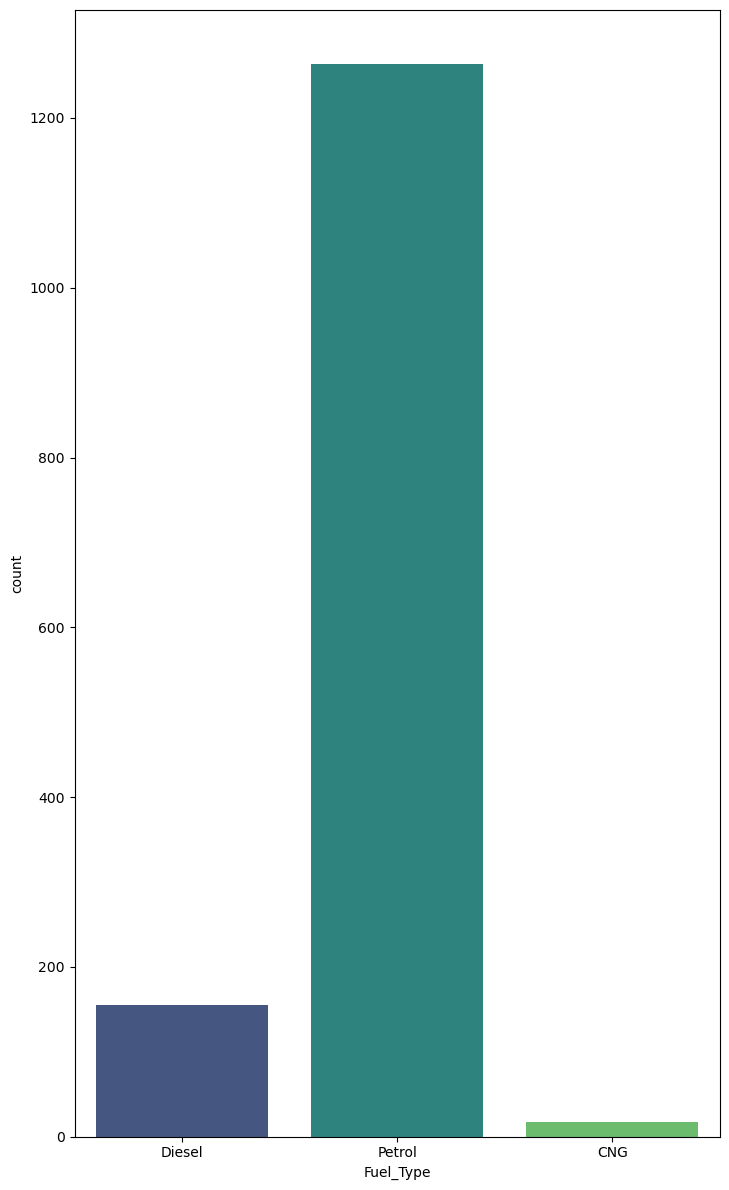

In [4]:
#BAR
def bar(data):
    n_obj=data.select_dtypes(include='object').columns
    l_obj=len(n_obj)
    sub_index=1
    n_rows=(l_obj+1)//2
    plt.figure(figsize=(14,12))
    for col in data:
        dtype=data[col].dtypes
        if(dtype == 'object'):
            plt.subplot(n_rows,2,sub_index)
            sns. countplot(x=data[col],data=data,palette='viridis')
            sub_index+=1
        else:
            print(f'The {col} contains the non object data type')
    plt.tight_layout()
    plt.show()  
bar(df)

The 'Fuel_Type' column contains the object data type.


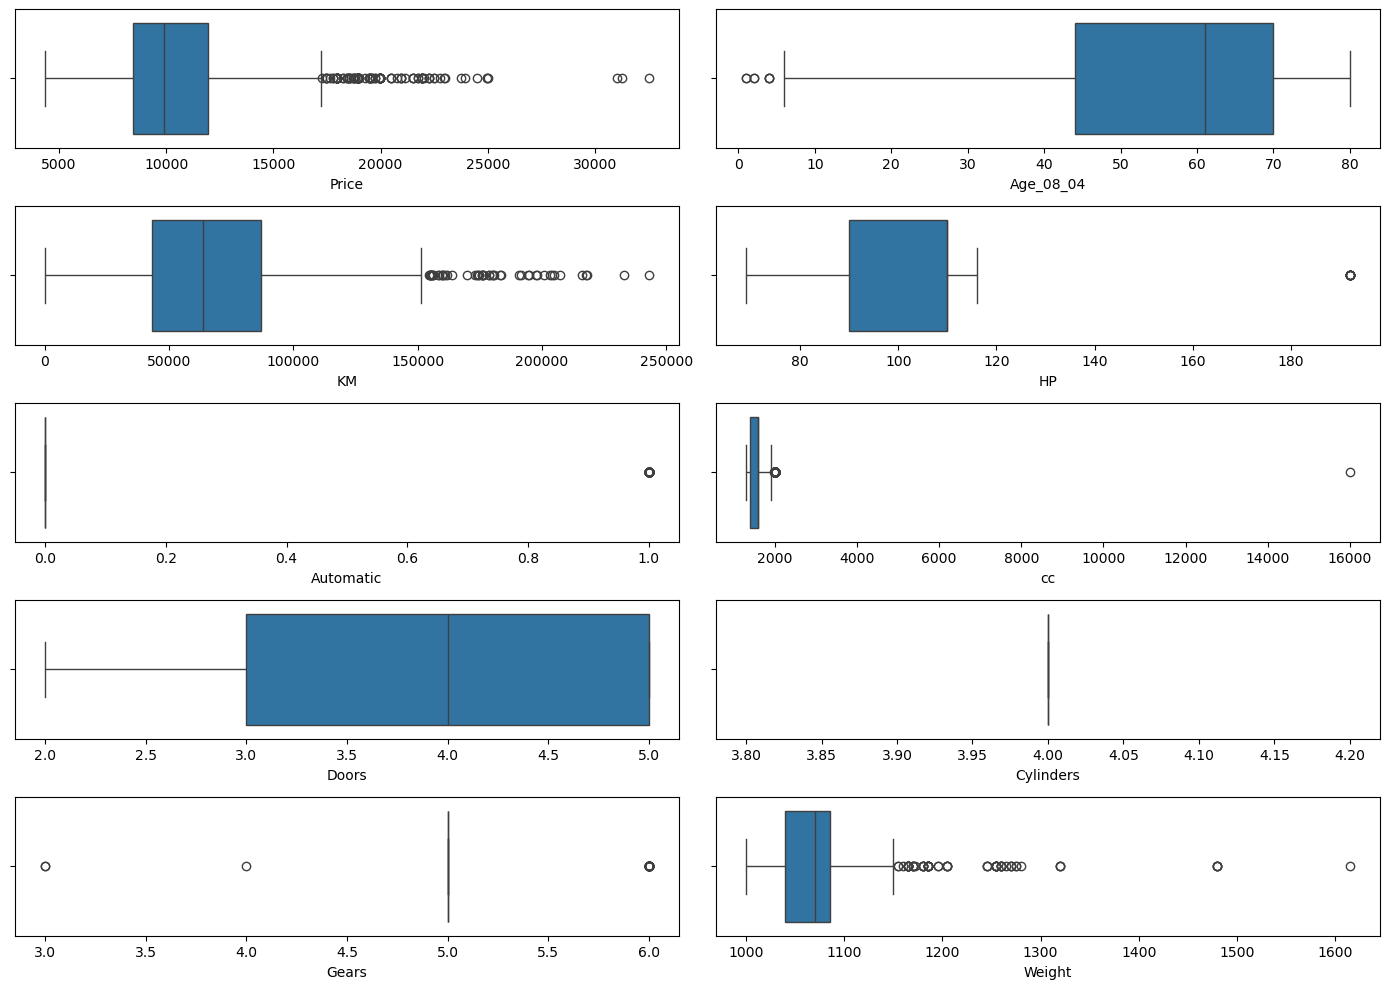

In [5]:
#BOXPLOT WITH OUTLIERS
def box(data):
    n_num=data.select_dtypes(exclude='object').columns
    l_num=len(n_num)
    n_rows=(l_num+1)//2
    sub_index=1
    plt.figure(figsize=(14,10))
    for col in data:
        dtype=data[col].dtypes
        if(dtype == 'object'):
            print(f"The '{col}' column contains the object data type.")
        else:
            plt.subplot(n_rows,2,sub_index)
            sns.boxplot(data=data[col],orient='h')
            sub_index+=1
    plt.tight_layout()
    plt.show()
box(df)

The 'Fuel_Type' column contains the object data type.


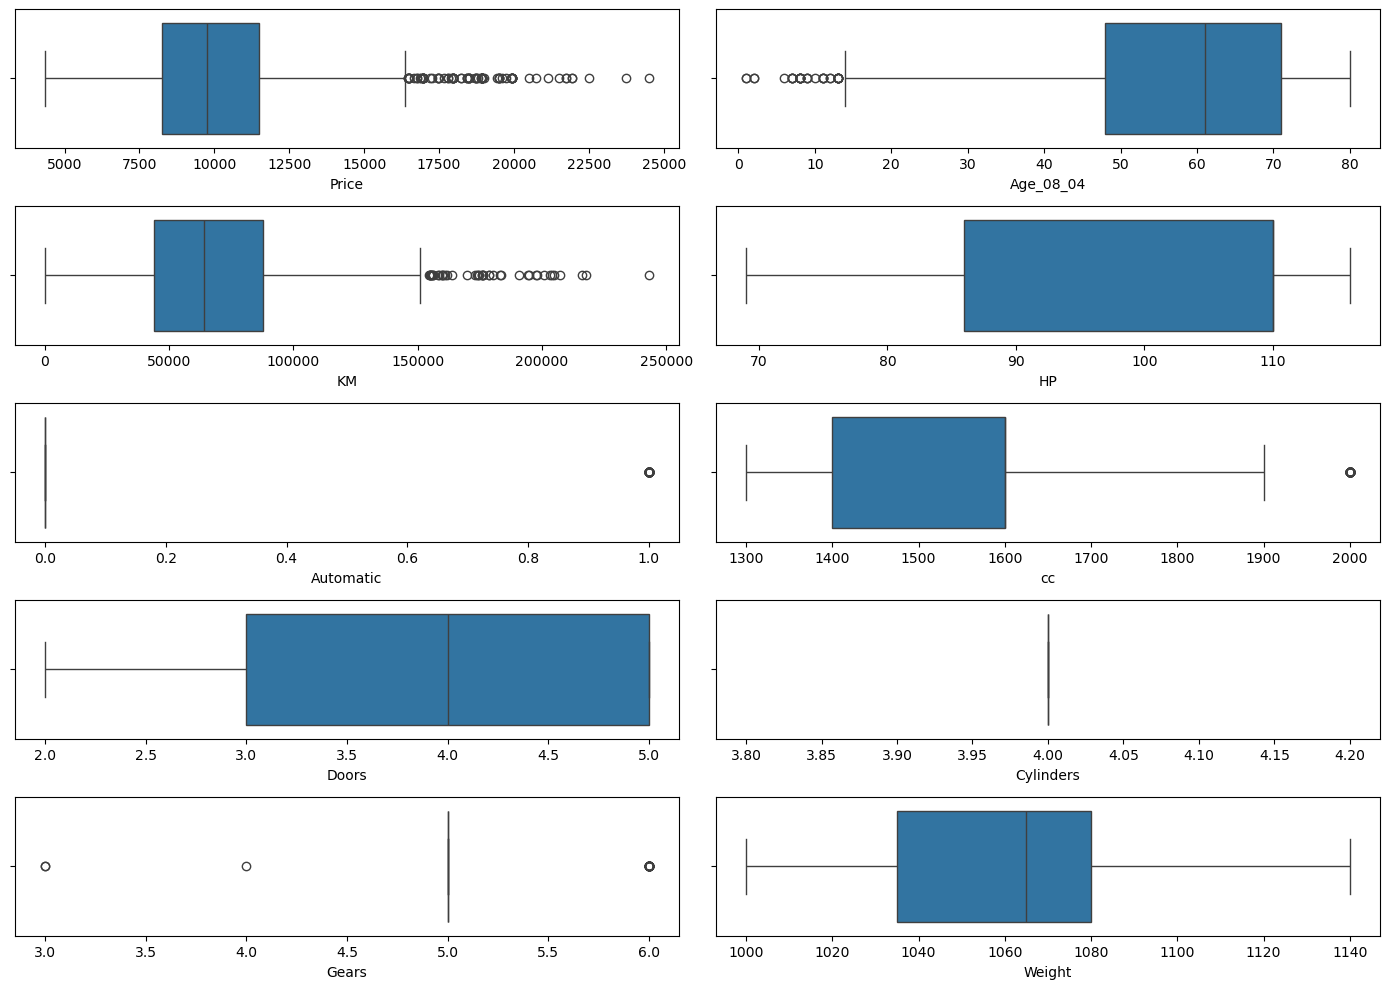

(1363, 11)

In [6]:
#To remove outliers        
def remove_outliers(data):
    for col in data.select_dtypes(include=('float64','int64')).columns:
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        IQR=Q3-Q1
        lowerbond=Q1-1.5*IQR
        upperbond=Q3+1.5*IQR
        df_cleaned=data[(data[col]>=lowerbond)&(data[col]<=upperbond)]
        df_cleaned= pd.DataFrame(df_cleaned)
        df_cleaned.columns=list(data)
    return df_cleaned    
df_cleaned=remove_outliers(df)
#if you want to clear all the outliers we have to run the remove_outliers function multiple times but instead of df we have to give the df_cleaned data then only we can remove all the outliers.
df_cleaned=remove_outliers(df_cleaned)
#After remove of outliers 
box(df_cleaned)
df_cleaned.shape

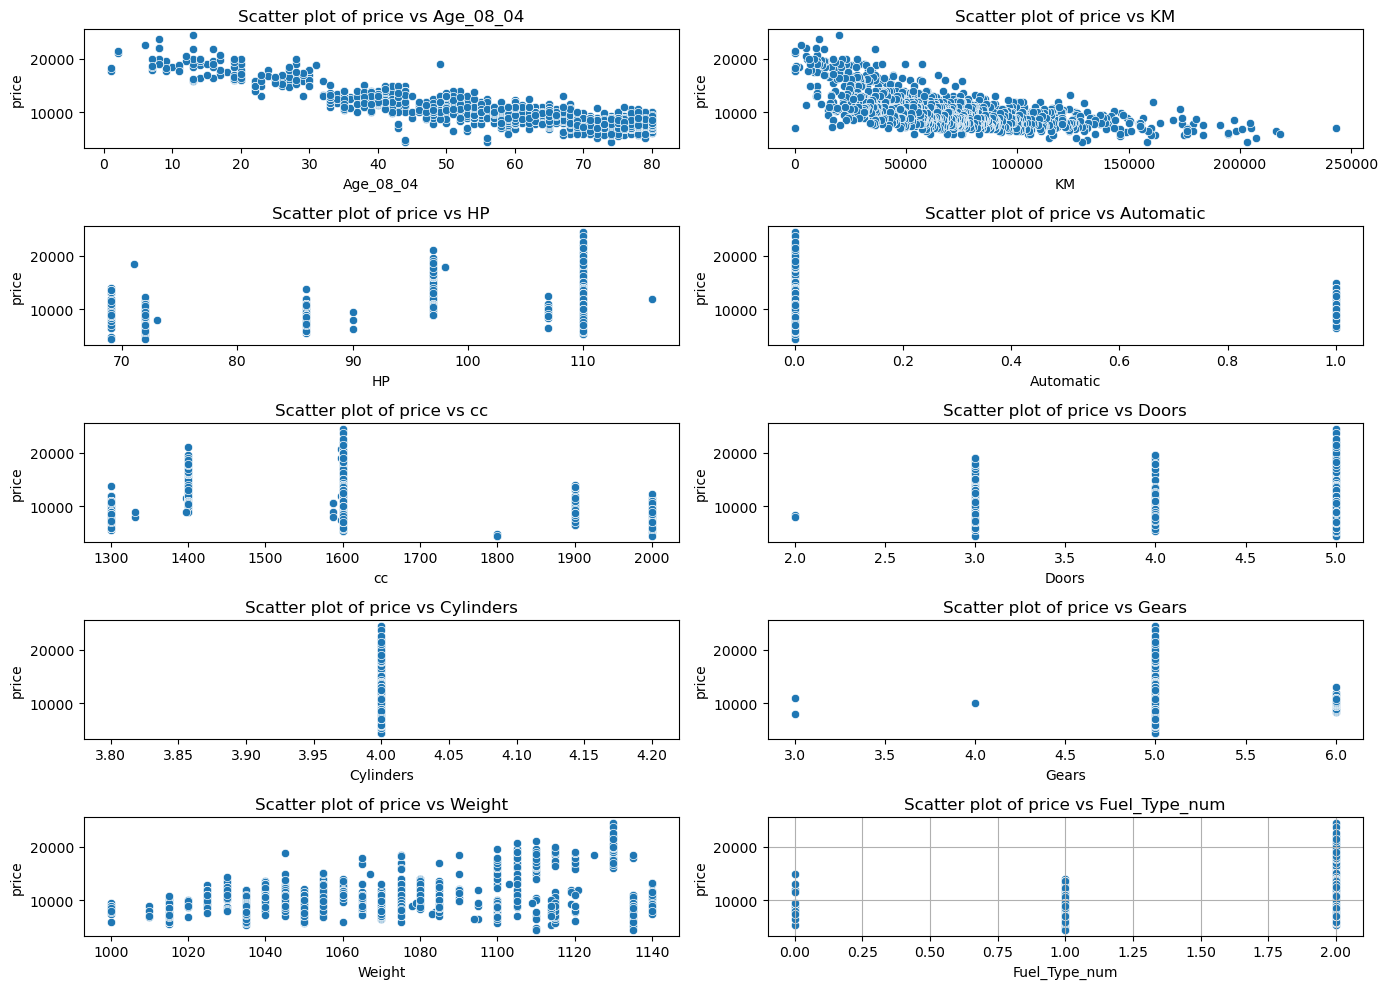

<class 'pandas.core.frame.DataFrame'>
Index: 1363 entries, 9 to 1435
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Price          1363 non-null   int64 
 1   Age_08_04      1363 non-null   int64 
 2   KM             1363 non-null   int64 
 3   Fuel_Type      1363 non-null   object
 4   HP             1363 non-null   int64 
 5   Automatic      1363 non-null   int64 
 6   cc             1363 non-null   int64 
 7   Doors          1363 non-null   int64 
 8   Cylinders      1363 non-null   int64 
 9   Gears          1363 non-null   int64 
 10  Weight         1363 non-null   int64 
 11  Fuel_Type_num  1363 non-null   int8  
dtypes: int64(10), int8(1), object(1)
memory usage: 129.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1363 entries, 9 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1363 non-null   int64 
 1   Age_08_04 

In [7]:
#The relationship between the price(target variable) and the other variables in the visualiztion formate
Target_variable=df_cleaned['Price']
def  relationship(data):
    for col in data.select_dtypes(include='object').columns:
        #which converts the categorical data into the numerical data which is simmillar to Lable encoding
        data[f'{col}_num']=data[col].astype('category').cat.codes
    n_num=data.select_dtypes(exclude='object').drop(Target_variable.name,axis=1).columns
    l_num=len(n_num)
    n_rows=(l_num+1)//2
    sub_index=1 
    plt.figure(figsize=(14,10))  
    for col in n_num:
        plt.subplot(n_rows,2,sub_index)
        sns.scatterplot(x=data[col],y=Target_variable)
        plt.xlabel(col)
        plt.ylabel('price')
        plt.title(f'Scatter plot of price vs {col}')
        sub_index+=1
    plt.tight_layout()
    plt.grid(True)
    plt.show()    
relationship(df_cleaned)
df_cleaned.info()
#sliceing the columns
df_cleaned=df_cleaned.iloc[:,:11]
df_cleaned.info()  

In [8]:
#Data Processing on dataset to fit the dataset to model
#A data contains different types of units ,so we convert them into single unit so we use Standardization or label encoding 
from sklearn.preprocessing import StandardScaler,LabelEncoder
std_s=StandardScaler()
LE=LabelEncoder()
def converter(data):
    add_data=[]
    column_names = data.columns
    for col in data:
        dtype = data[col].dtypes
        if dtype == 'object':
            converted_col = LE.fit_transform(data[col])           
        else:
            converted_col = std_s.fit_transform(data[[col]]).flatten()
        add_data.append(converted_col)
    final_data = pd.DataFrame({col: add_data[i] for i, col in enumerate(column_names)})
    return final_data
final_data = converter(df_cleaned)
print(final_data)

         Price  Age_08_04        KM  Fuel_Type        HP  Automatic        cc  \
0     0.851182  -1.960386  0.058496          1 -2.518673  -0.230918  2.046824   
1     2.490919  -1.903355 -1.292998          2  0.709265  -0.230918  0.295890   
2     2.097382  -1.903355 -1.187798          2  0.709265  -0.230918  0.295890   
3     2.162972  -1.561170 -0.126883          2  0.709265  -0.230918  0.295890   
4     1.835024  -1.561170 -0.036614          2  0.709265  -0.230918  0.295890   
...        ...        ...       ...        ...       ...        ...       ...   
1358 -0.936132   0.663030 -1.325047          2 -1.180260  -0.230918 -1.455044   
1359  0.160852   0.834122 -1.367270          2 -1.180260  -0.230918 -1.455044   
1360 -0.608185   0.777091 -1.421524          2 -1.180260  -0.230918 -1.455044   
1361 -1.018119   0.720061 -1.424259          2 -1.180260  -0.230918 -1.455044   
1362 -1.116503   1.062245 -1.886816          2  0.709265  -0.230918  0.295890   

         Doors  Cylinders  

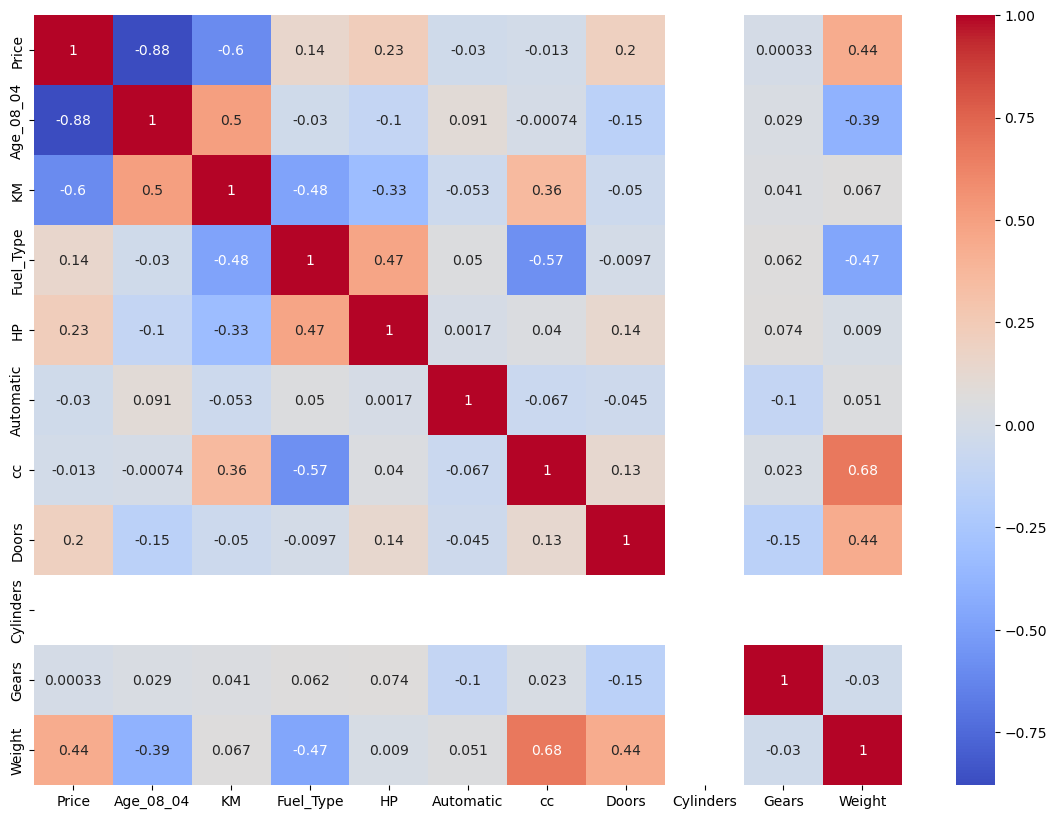

In [9]:
#Correlation metric
plt.figure(figsize=(14,10))
sns.heatmap(final_data.corr(),annot=True, cmap='coolwarm')
plt.show()

In [10]:
#Target variable
Y=final_data['Price']
X1=final_data[['Age_08_04','KM','Weight','HP','Doors','Fuel_Type','cc','Automatic','Gears']]
X2=final_data[['Age_08_04','KM','Doors','cc','Automatic']]
X3=final_data[['Weight','HP','Fuel_Type','Gears']]
X4=final_data[['Age_08_04','KM','Doors','cc']]

In [11]:
#Model fitting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score
def model_fitting(x,y,z):
    #Spliting the data or data partition
    global model_coef
    global model_names
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)
    model=LinearRegression()
    model.fit(X_train,Y_train)
    model_coef=model.coef_
    model_names=x.columns
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    rmse=root_mean_squared_error(Y_train, y_pred_train)
    rmse1=root_mean_squared_error(Y_test, y_pred_test)
    r2score=r2_score(Y_test,y_pred_test)
    print(f'The below values belongs to ::{z}')
    print("Intercept:", model.intercept_)
    for col, coef in zip(x.columns, model.coef_):
        print(f"Coefficient for {col}: {coef}")
    #Better to do cross validation on training data which gives best model performance,which will also gives an average of error value
    print('Root mean square or Training error::',np.round(rmse,2))
    print("Root  mean square or Testing error::",np.round(rmse1,2))
    print('r2_score::',np.round(r2score,2))
    print('\n')

In [12]:
model_fitting(X1,Y,'Model_1')
model_fitting(X2,Y,'Model_2')
model_fitting(X3,Y,'Model_3')
model_fitting(X4,Y,'Model_4')

The below values belongs to ::Model_1
Intercept: -0.5219340264976238
Coefficient for Age_08_04: -0.656148977586025
Coefficient for KM: -0.18307584454490367
Coefficient for Weight: 0.33373933514242904
Coefficient for HP: 0.06032507542894584
Coefficient for Doors: -0.048764366931076206
Coefficient for Fuel_Type: 0.27177005628274015
Coefficient for cc: -0.12356396338096703
Coefficient for Automatic: -0.010799717836810323
Coefficient for Gears: 0.023085917617120547
Root mean square or Training error:: 0.38
Root  mean square or Testing error:: 0.39
r2_score:: 0.86


The below values belongs to ::Model_2
Intercept: 0.011612755069208728
Coefficient for Age_08_04: -0.755432333173905
Coefficient for KM: -0.2384954999601379
Coefficient for Doors: 0.07342690582924184
Coefficient for cc: 0.060316570367941705
Coefficient for Automatic: 0.027722496250920436
Root mean square or Training error:: 0.44
Root  mean square or Testing error:: 0.39
r2_score:: 0.83


The below values belongs to ::Model_3
Inte

In [13]:
#When do use regularization?
'''
1.When the model is fitted with too many variables 
2.When we didn't removed the total outlier
3.Model is overfitting
4.When the variance between train and test error is huge 
'''

"\n1.When the model is fitted with too many variables \n2.When we didn't removed the total outlier\n3.Model is overfitting\n4.When the variance between train and test error is huge \n"

In [14]:
from sklearn.linear_model import Ridge,Lasso
def Regularization(x,y,Regression,alpha):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)
    names=pd.DataFrame(list(model_names),columns=['Names'])
    m_coef=pd.DataFrame(model_coef,columns=['Linear_Regression_coef'])
    #Ridge regression
    if(Regression == Ridge):
        ridge=Ridge(alpha=alpha)
        ridge.fit(X_train,Y_train)
        ridge_coef=ridge.coef_
        r_coef=pd.DataFrame(ridge_coef,columns=['Ridge_Regression_coef'])
        print(pd.concat([names,m_coef,r_coef],axis=1)) 
    #Lasso regression
    elif(Regression == Lasso):
        lasso=Lasso(alpha=alpha)
        lasso.fit(X_train,Y_train)
        Lasso_coef=lasso.coef_
        L_coef=pd.DataFrame(Lasso_coef,columns=['Lasso_Regression_coef'])
        print(pd.concat([names,m_coef,L_coef],axis=1))
    print('\n') 

In [15]:
model_fitting(X1,Y,'Model_1')
Regularization(X1,Y,Ridge,10)
Regularization(X1,Y,Lasso,0.04)

The below values belongs to ::Model_1
Intercept: -0.4026757241883497
Coefficient for Age_08_04: -0.6438246595588819
Coefficient for KM: -0.18422772915599633
Coefficient for Weight: 0.355071139315842
Coefficient for HP: 0.08237321642948202
Coefficient for Doors: -0.06020545685775372
Coefficient for Fuel_Type: 0.21194813356919245
Coefficient for cc: -0.138592347686946
Coefficient for Automatic: -0.009639449423110395
Coefficient for Gears: 0.009973758515768046
Root mean square or Training error:: 0.38
Root  mean square or Testing error:: 0.38
r2_score:: 0.86


       Names  Linear_Regression_coef  Ridge_Regression_coef
0  Age_08_04               -0.643825              -0.661023
1         KM               -0.184228              -0.178836
2     Weight                0.355071               0.318758
3         HP                0.082373               0.062016
4      Doors               -0.060205              -0.040081
5  Fuel_Type                0.211948               0.211973
6         cc    

In [16]:
#what is normalization
'''
Normalization is a data preprocessing technique that ensures all the features or variable will converted to a single unit. which helps to imporve the model performance,it also prevents the more bias
The data will always fall between [0,1] or [-1,1]. Model like k-means,(K-NN) k-Nearest Neighbors,(SVM) support vector meachine which rely on distance metrics, where we use normalization.
'''
#what is standardization
'''
Standardization is a data preprocessing techinique to scale features to have a mean of 0 and standard deviation of 1. It also known as Z-score distribution, unlike the normalization which certain 
specific range where as the standardization adjusts the data to follow a standard normal distribution. When the features follows the normal distribution then only we use standarization, standardizatio 
only works efficiently on few model. It only for numerical features

'''

'\nStandardization is a data preprocessing techinique to scale features to have a mean of 0 and standard deviation of 1. It also known as Z-score distribution, unlike the normalization which certain \nspecific range where as the standardization adjusts the data to follow a standard normal distribution. When the features follows the normal distribution then only we use standarization, standardizatio \nonly works efficiently on few model. It only for numerical features\n\n'